In [1]:
#Se importan las librerías necesarias
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Creamos la función que leerá las imágenes
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    elif(mode=='yuv' or mode=='YUV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2YUV)
    elif(mode=='hsv' or mode=='HSV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2HSV)
    elif(mode=='lab' or mode=='LAB'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2LAB)
    
    elif(mode=='negativo' or mode=='negative'):
        return cv2.subtract(255 , cv2.imread(filename, cv2.IMREAD_GRAYSCALE))
    
    else:
        return None

Creamos una función que seleccione un archivo contenido en la carpeta de acuerdo al numero ingresado

In [3]:
def choose_file(num):
    """
    num: archivo de imagen que queremos leer
    Seleccionamos el archivo en la posicion "num" contenido en la carpeta "res"
    """
    directory = "res/"
    files = os.listdir(directory)
    if num >= len(files):
        raise ValueError("El número proporcionado es mayor o igual que el número de archivos disponibles en la carpeta.")
    selected_file = files[num]
    return selected_file

Escogemos el archivo dentro de la carpeta que deseamos leer.

In [4]:
############almacenamos la imagen en una ruta


#Escogemos el numero del archivo que queremos leer
imagen_n = 4



ruta = f"res/{choose_file(imagen_n)}"
#leemos la imagen y la almacenamos
img_rgb = img_read(ruta , 'color')
img_gray = img_read(ruta, 'gray')
img_neg = img_read(ruta, 'negativo')

print(f'La imagen es: {ruta}')


La imagen es: res/00000011_006.png


A continuación, leemos la imagen y presentamos su negativo, el cual será útil para la obtención de información.

Text(0.5, 1.0, 'Imagen en negativo')

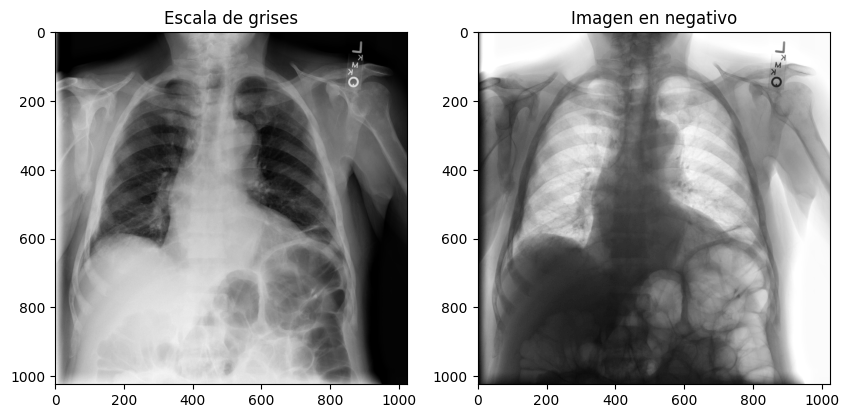

In [5]:
# Mostramos la imagen original en escala de grises y en negativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Para la imagen 1
ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Escala de grises')
#Para la imagen 2
ax2.imshow(img_neg, cmap='gray')
ax2.set_title('Imagen en negativo')


Definimos las funciones para transformar las imagenes antes de realizar detección de bordes
Entre estas, hemos visto buenos resultados al ecualizar y al usar la corrección gamma

In [8]:
#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):

    """
    Corrección gamma

    f(x) = a(x)^(gamma)
    
    img: imagen de entrada
    a: parametro a
    gamma: exponente gamma    
    """
        
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    
    #La función corrección gamma es de la forma ax^gamma donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy, gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    return res





def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def histogram_equalization(img):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), density=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

A continuación presentamos diferentes tratamientos con corrección gamma y ecualización

Podemos también considerar combinar la corrección gamma y ecualizar

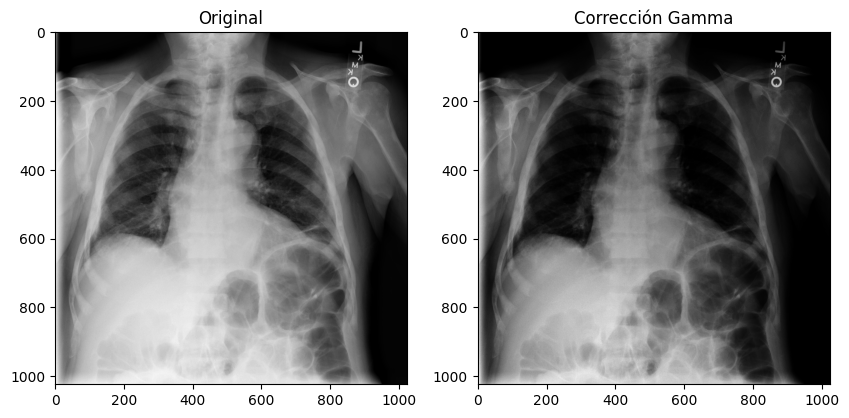

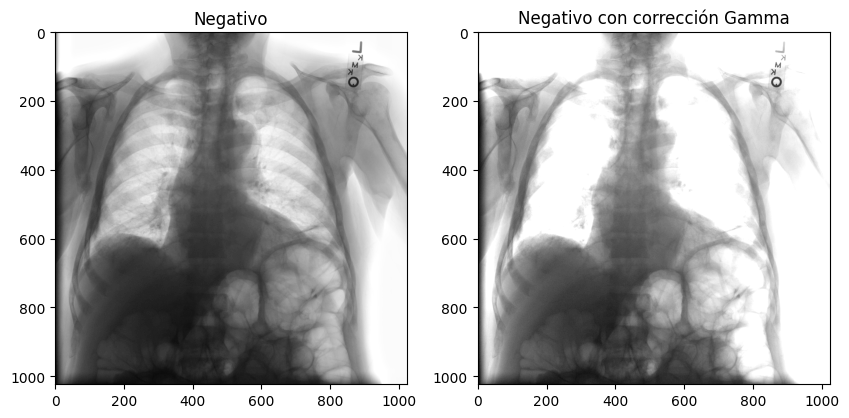

<Figure size 640x480 with 0 Axes>

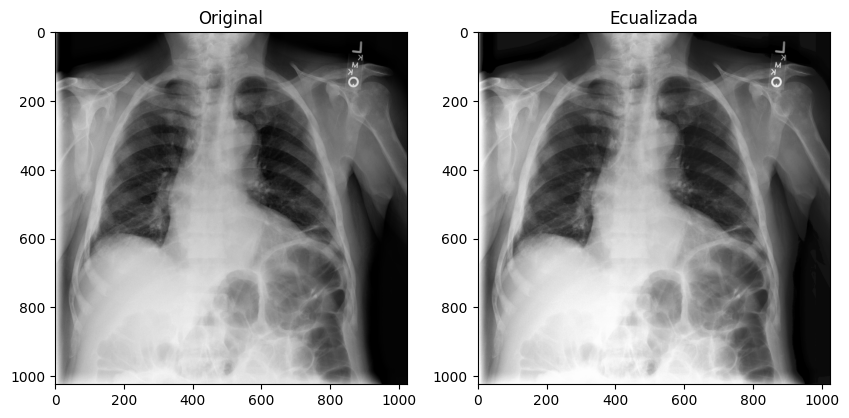

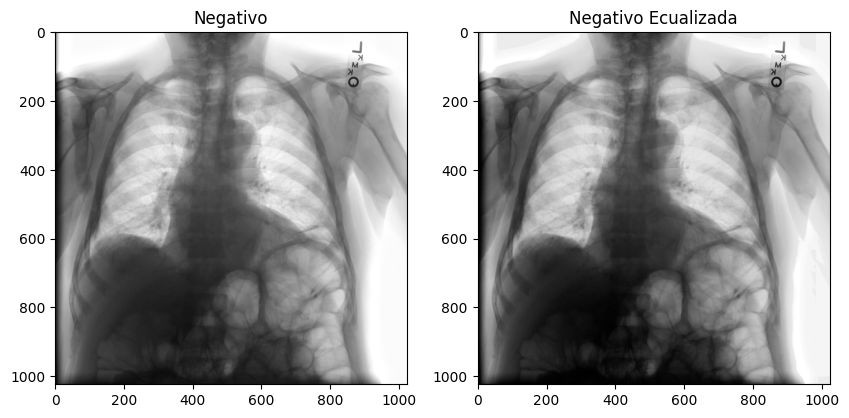

In [7]:
#---------------------------------------------------------- original / original_gamma ----------------------------------------
gamma_gray = gamma_correction(img_gray, a=0.9, gamma=2)
# Mostramos la imagen original en escala de grises y en negativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Para la imagen 1
ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original')
#Para la imagen 2
ax2.imshow(gamma_gray, cmap='gray')
ax2.set_title('Corrección Gamma')
# Display the plot
plt.show()
#------------------------------------------------------ FIN original / original_gamma ----------------------------------------

#------------------------------------------------------ Negativo / gamma_neg ----------------------------------------
gamma_neg = gamma_correction(img_neg, a=1.5, gamma=0.95)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Para la imagen 1
ax1.imshow(img_neg, cmap='gray')
ax1.set_title('Negativo')
#Para la imagen 2
ax2.imshow(gamma_neg, cmap='gray')
ax2.set_title('Negativo con corrección Gamma')
# Display the plot
plt.show()
#--------------------------------------------------- FIN Negativo / gamma_neg ----------------------------------------


#------------------------------------------------------ Original / Ecualizada ----------------------------------------
#aplicamos equalizacion

#REVISAR POR QUE NO FUNCIONA CON ESCALAS DE GRISES
equal = apply_f_on_rgb(img_rgb, histogram_equalization, [])
equal_neg = 255-equal


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Para la imagen 1
ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original')
#Para la imagen 2
ax2.imshow(equal, cmap='gray')
ax2.set_title('Ecualizada')
# Display the plot
plt.show()
#------------------------------------------------------ FIN Original / Ecualizada ----------------------------------------

#------------------------------------------------------ Negativo / Ecualizada ----------------------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Para la imagen 1
ax1.imshow(img_neg, cmap='gray')
ax1.set_title('Negativo')
#Para la imagen 2
ax2.imshow(equal_neg, cmap='gray')
ax2.set_title('Negativo Ecualizada')
# Display the plot
plt.show()



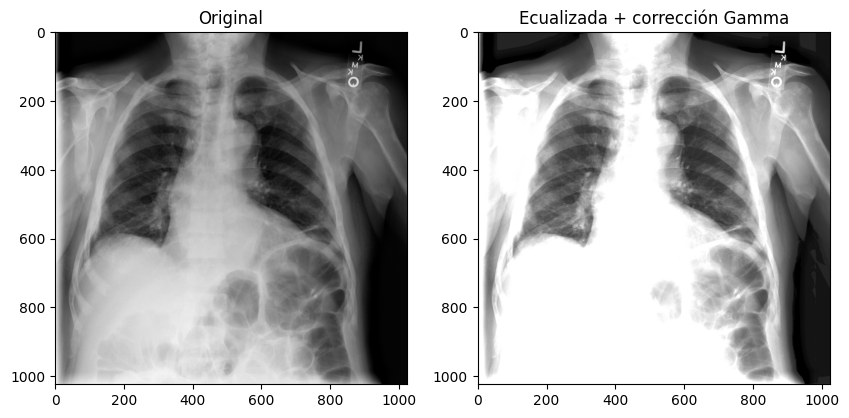

Text(0.5, 1.0, 'Negativo Ecualizada + corrección Gamma')

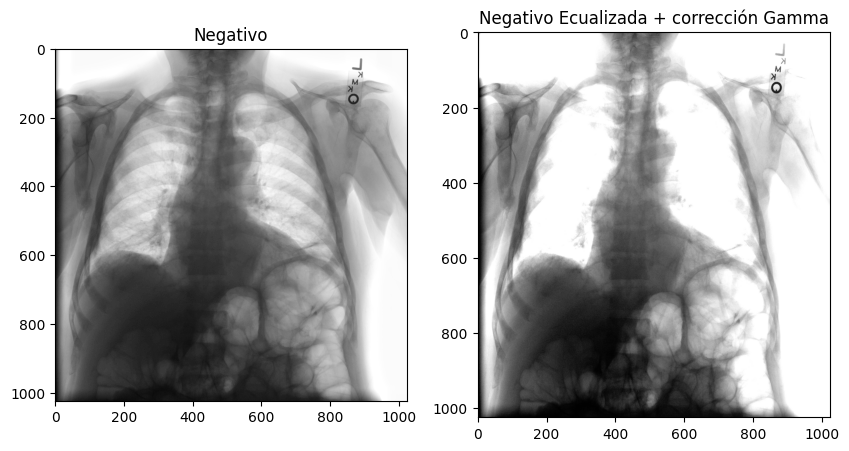

In [27]:
equal_gamma = apply_f_on_rgb(equal,  gamma_correction,[1.5,0.9])# a=1.5, b=0.9
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Para la imagen 1
ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original')
#Para la imagen 2
ax2.imshow(equal_gamma, cmap='gray')
ax2.set_title('Ecualizada + corrección Gamma')
# Display the plot
plt.show()

equal_gamma_neg = apply_f_on_rgb(equal_neg,gamma_correction, [1.5,0.95])# a=1.5, b=0.95
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Para la imagen 1
ax1.imshow(img_neg, cmap='gray')
ax1.set_title('Negativo')
#Para la imagen 2
ax2.imshow(equal_gamma_neg, cmap='gray',aspect='auto')
ax2.set_title('Negativo Ecualizada + corrección Gamma')


Definimos la función de detección de bordes, donde podemos establecer umbrales mínimos y máximo, grosor del delineado, color (3 colores), el título de la imagen y el retorno que nos dará la función.

In [29]:
#Definimos una función para detectar bordes
def detect_edge(image, u_min, u_max, width, color_bordes = '', title ='Imagen original',canal = '', modo = ''):
    """
    Detectamos los bordes \n
    Parametros:
    image:imagen de entrada
    u_min: umbral minimo
    u_max: umbral maximo
    width: grosor de las lineas
    title: Titulo
    modo:si queremos desplegar la comparativa o guardar la imagen de los bordes en una variable:
    "compare" para desplegar dos imagenes: original vs bordes
    "add" para mostrar unicamente la superposicion de la imagen
    "img" para guardar la imagen que se retorna en una variable

    """
    image_edges = cv2.Canny(image,u_min,u_max)
    #--------------------------------------DILATACION DE BORDES--------------------------
    # Crear un kernel de dilatación
    kernel = np.ones((width,width), np.uint8)
    # Dilatar los bordes para aumentar su grosor
    dilated_edges = cv2.dilate(image_edges, kernel, iterations=1)
    #-------------------------------------FIN DILATACION DE BORDES---------------------------
    #----------------------------------------COLOR DE BORDES----------------------------------
    if (color_bordes == '' or color_bordes == 'rojo' or color_bordes == 'Rojo' or color_bordes == 'red' or color_bordes == 'Red'):
        # Convertir bordes a Rojo
        result = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)
        result[:, :, 1] = 0  # cambiar canal GREEN a 0
        result[:, :, 2] = 0  # cambiar canal BLUE a 0
    elif (color_bordes == 'verde' or color_bordes == 'Verde' or color_bordes == 'green' or color_bordes == 'Green'):
        # Convertir bordes a Verde
        result = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)
        result[:, :, 0] = 0  # cambiar canal RED a 0
        result[:, :, 2] = 0  # cambiar canal BLUE a 0
    elif (color_bordes == 'azul' or color_bordes == 'Azul' or color_bordes == 'blue' or color_bordes == 'Blue'):
        # Convertir bordes a Azul
        result = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)
        result[:, :, 0] = 0  # cambiar canal RED a 0
        result[:, :, 1] = 0  # cambiar canal GREEN a 0
    #-------------------------------------------------------------------------------------------

    if (modo == 'comparación' or modo == 'comparacion' or modo == 'Comparacion' or modo == 'compare'):
        # Usamos cv2.Canny para detectar los bordes
        # Creamos el plot que muestra imagen original/imagen con bordes
        #------------------------------------------------------------------------
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
        fig.suptitle(canal, fontsize=15)
        ax1.set_title(title)
        ax1.imshow(image, cmap='gray')
        ax2.set_title('Bordes obtenidos')
        ax2.imshow(result)
        #------------------------------------------------------------------------

    elif (modo == 'add' or modo == 'superponer' or modo == 'Superponer' or modo == 'super'):
        if len(np.shape(image)) == 3:   #Esto es, si la imagen es RGB, que cuenta con 3 canales
            res_post = cv2.add(image, result)
            # Creamos el plot que muestra imagen original/imagen con bordes superpuestos
            #------------------------------------------------------------------------
            fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
            fig.suptitle(canal, fontsize=15)
            ax1.set_title(title)
            ax1.imshow(image, cmap='gray')
            ax2.set_title('Imagen con bordes resaltados')
            ax2.imshow(res_post)
            #------------------------------------------------------------------------
    
        elif len(np.shape(image)) == 2: #Esto si la imagen es en escala de grises, que cuenta con 2 canales
            imagen_entrada = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
            res_post = cv2.add(img_rgb, result)
            # Creamos el plot que muestra imagen original/imagen con bordes superpuestos
            #------------------------------------------------------------------------
            fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
            fig.suptitle(canal, fontsize=15)
            ax1.set_title(title)
            ax1.imshow(image, cmap='gray')
            ax2.set_title('Imagen con bordes resaltados')
            ax2.imshow(res_post)
            #------------------------------------------------------------------------
    
    elif (modo == 'img'):
        return result

Con esto, leemos la imagen deseada para determinar sus bordes y ver únicamente estos bordes. En este caso leemos: imagen original, imagen con correccion gamma, imagen negativa, e imagen negativa con corrección gamma.

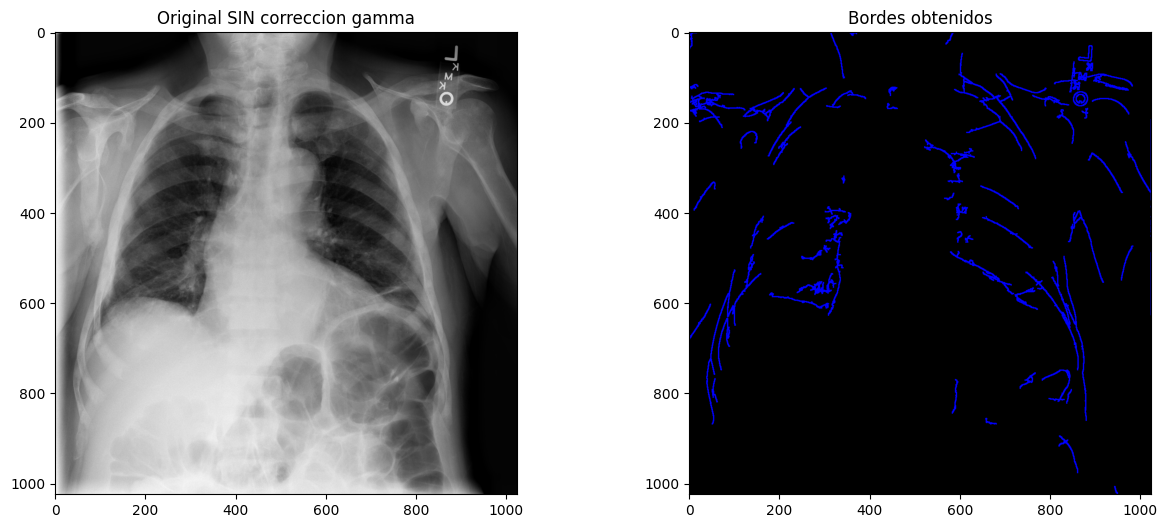

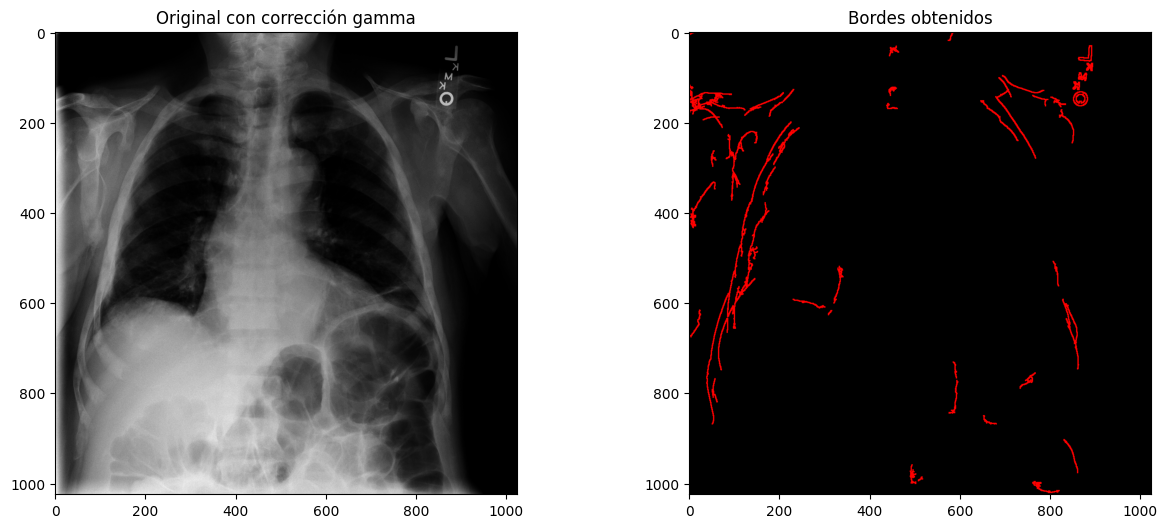

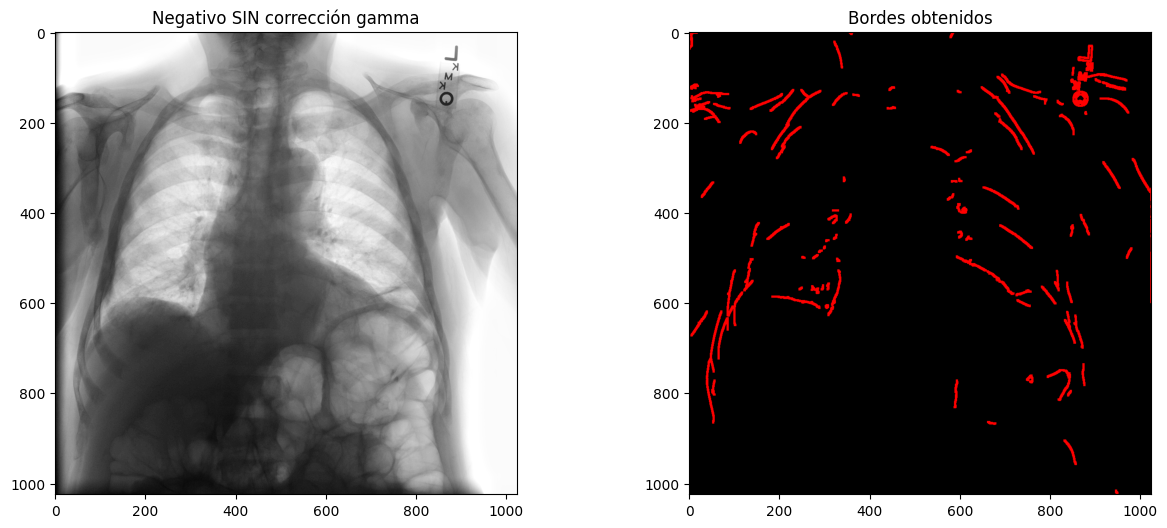

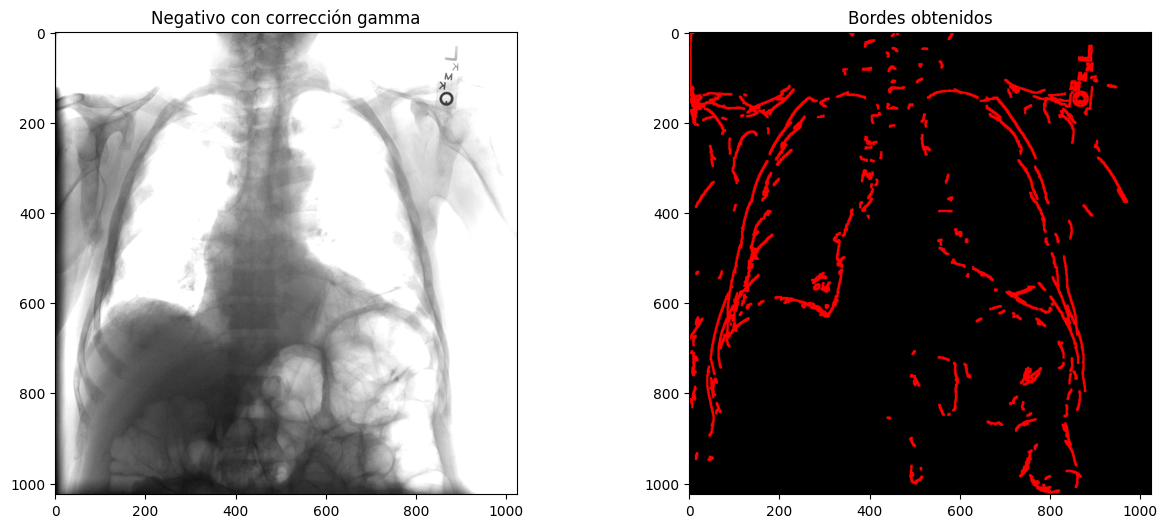

In [30]:
#realizamos primero la correción gamma
gamma_gray = gamma_correction(img_gray, a=0.9, gamma=2)
gamma_neg = gamma_correction(img_neg, a=1.5, gamma=0.95)

#Usamos nuestra función para observar la diferencia en detección de bordes de la imagen antes y despues de la corrección

detect_edge(img_rgb, 40, 140,3,'azul',"Original SIN correccion gamma",modo = 'compare')
detect_edge(gamma_gray, 40, 140,3,'rojo',"Original con corrección gamma",modo = 'comparación')
detect_edge(img_neg, 80, 140,5,'rojo',"Negativo SIN corrección gamma",modo = 'compare')
detect_edge(gamma_neg, 80, 140,5,'rojo',"Negativo con corrección gamma",modo = 'compare')

La composición de ecualización + corrección gamma nos arrojó muy buenos resultados

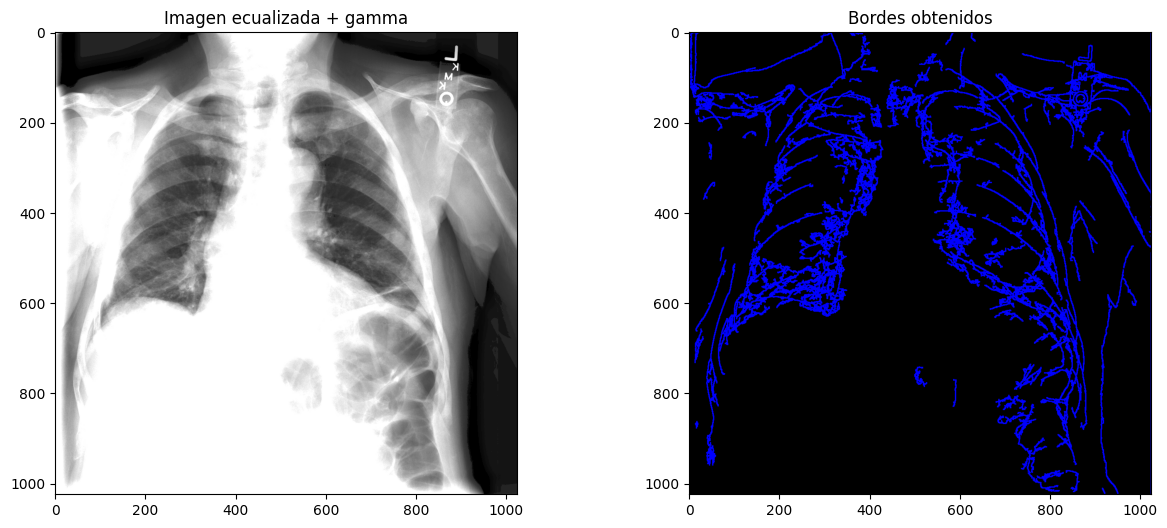

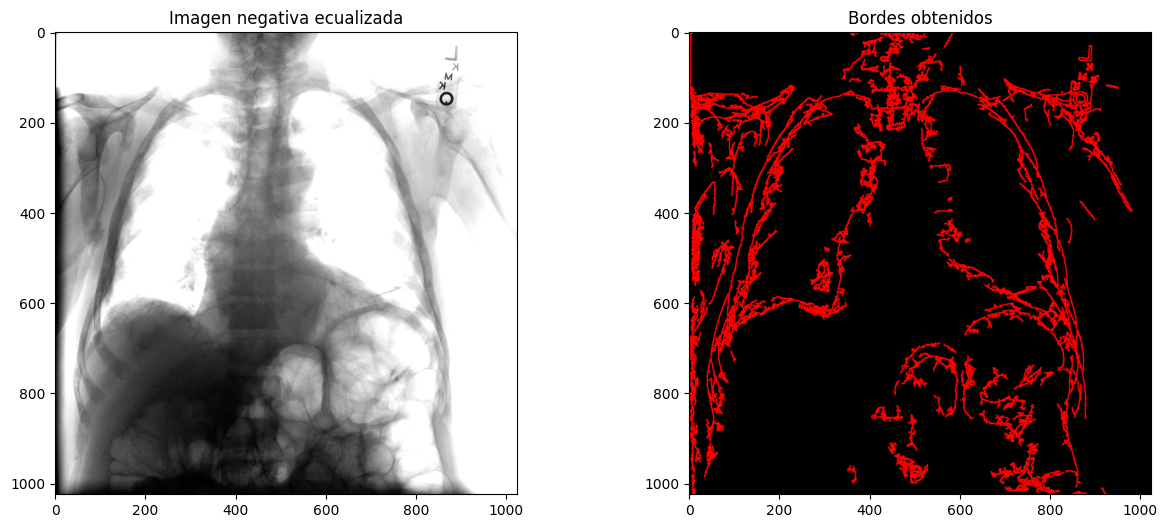

In [32]:
detect_edge(equal_gamma, 40, 140,3,'azul',"Imagen ecualizada + gamma",modo = 'compare')
detect_edge(equal_gamma_neg, 40, 140,3,'rojo',"Imagen negativa ecualizada",modo = 'comparación')

Podemos entonces superponer los bordes sobre la imagen que deseemos, en este caso sobre la original

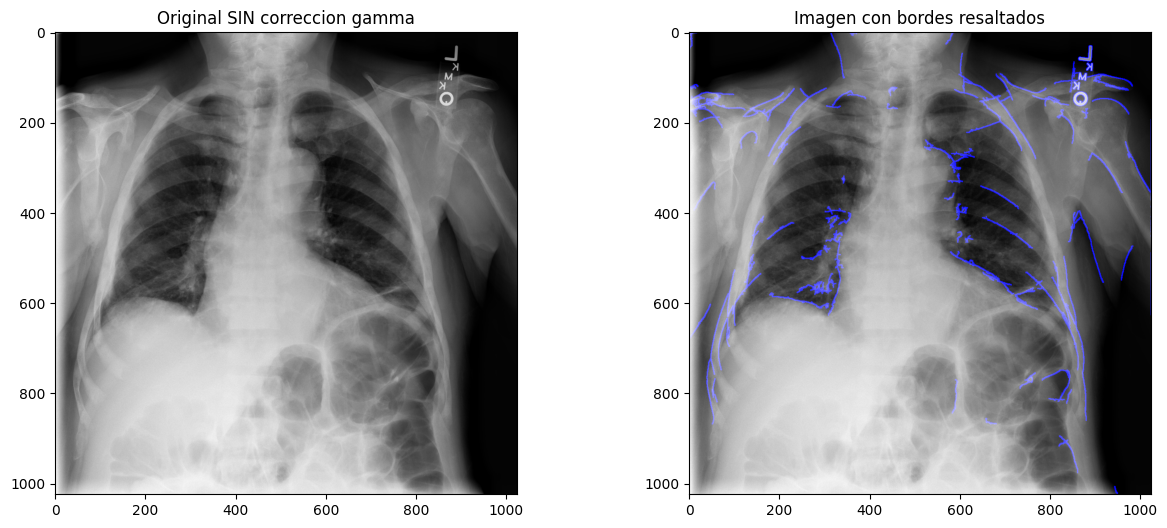

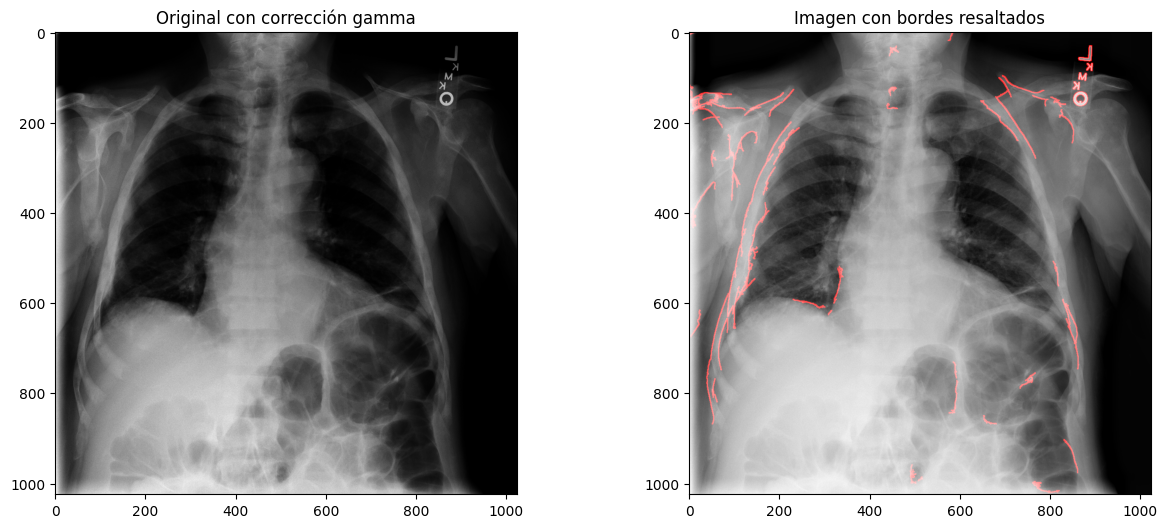

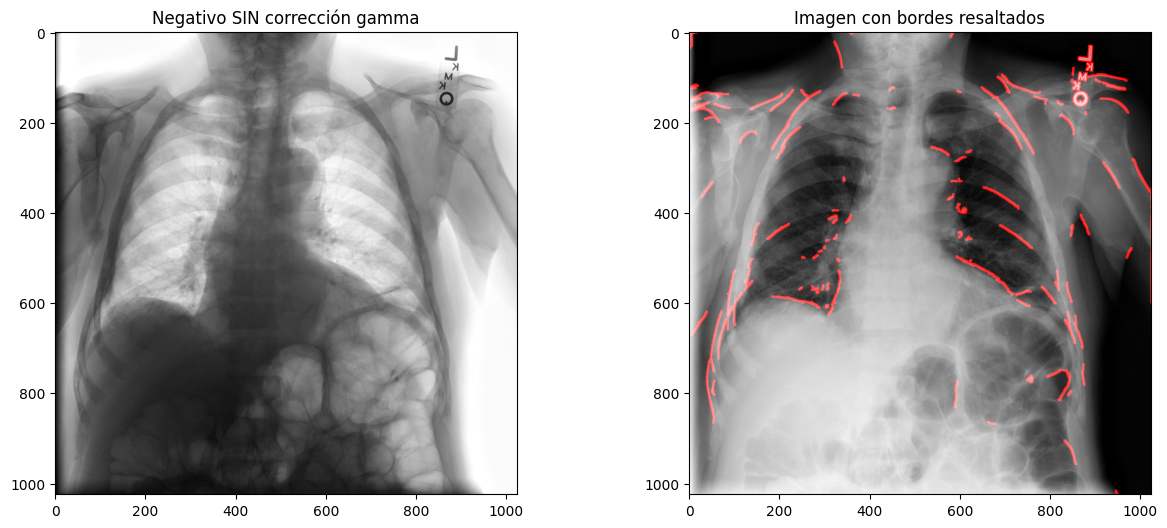

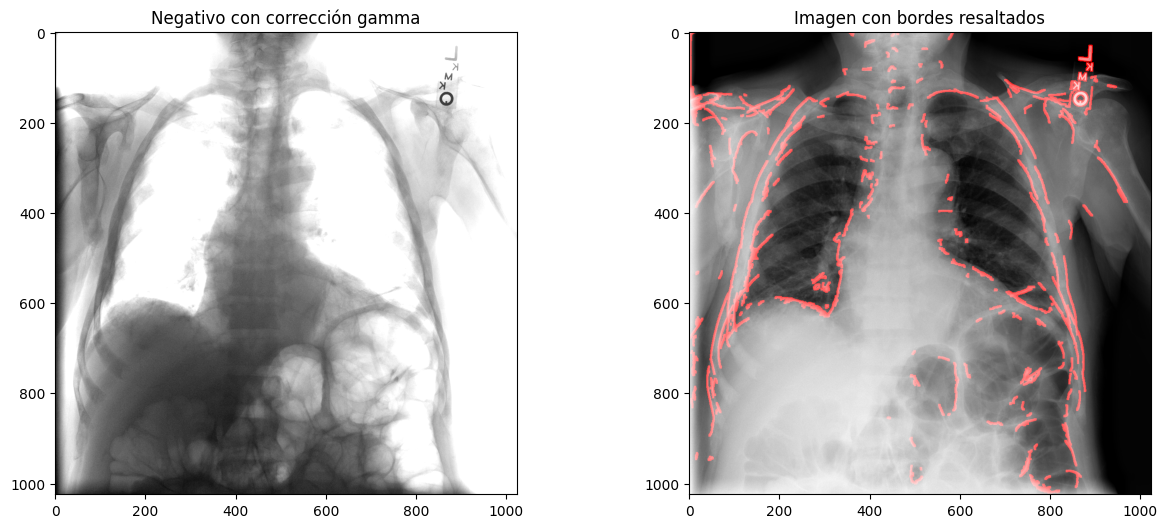

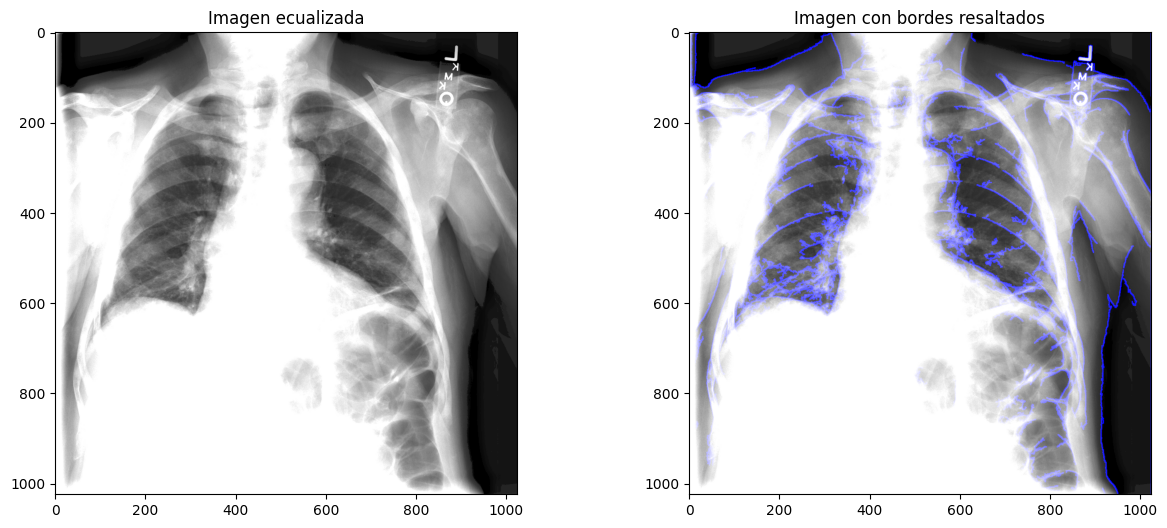

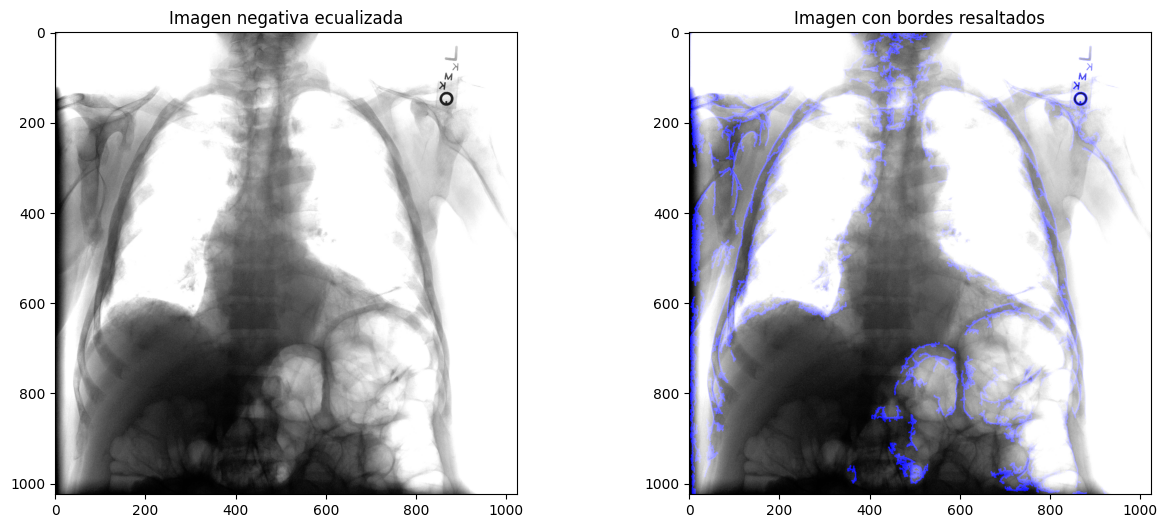

In [34]:
detect_edge(img_rgb, 40, 140,3,'azul',"Original SIN correccion gamma",modo = 'add')
detect_edge(gamma_gray, 40, 140,3,'rojo',"Original con corrección gamma",modo = 'add')
detect_edge(img_neg, 80, 140,5,'rojo',"Negativo SIN corrección gamma",modo = 'add')
detect_edge(gamma_neg, 80, 140,5,'rojo',"Negativo con corrección gamma",modo = 'add')
detect_edge(equal_gamma, 40, 140,3,'azul',"Imagen ecualizada",modo = 'add')
detect_edge(equal_gamma_neg, 40, 140,3,'azul',"Imagen negativa ecualizada",modo = 'add')